## Гауссово распределение, линейный дискриминантный анализ и наивный байес

### 1. Многомерное гауссово распределение
Создайте случайную выборку данных с двумерным гауссовым распределением. Для этого сперва сделайте два вектора из двух одномерных распределений с разными стандартными отклонениями $\sigma_1$ и $\sigma_2$, как показано ниже:  
``` python
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
```
После чего сделайте матрицу поворота на угол $\alpha$ и с помощью неё поверните набор точек в пространстве.  
Посчитайте матрицу ковариации для сгенерированных точек.  
Нарисуйте полученное облако точек и сравните его с облаком точек, полученных с помощью готовой функции:  `np.random.multivariate_normal()`


=== 1. МНОГОМЕРНОЕ ГАУССОВО РАСПРЕДЕЛЕНИЕ ===
Matriz de covarianza (manual):
[[ 0.14365677 -0.13411021]
 [-0.13411021  0.14407196]]


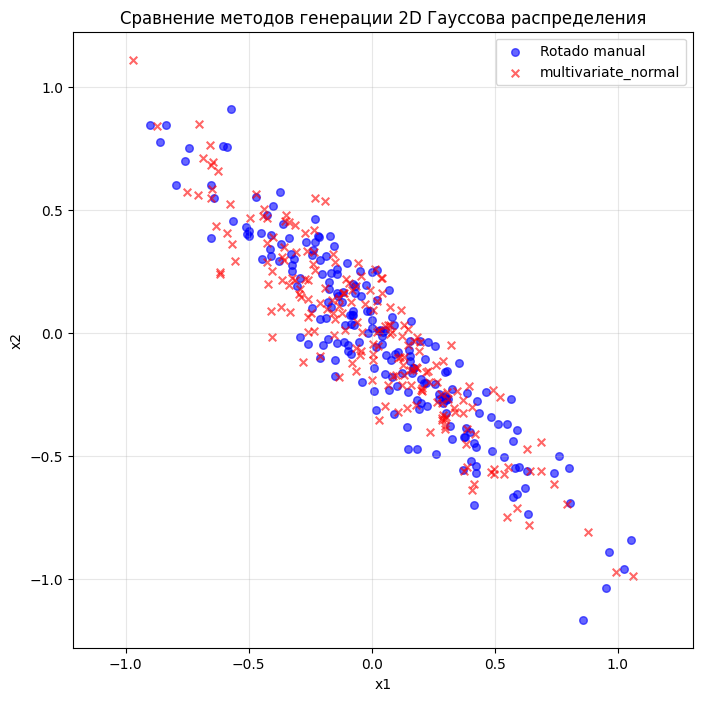

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("=== 1. МНОГОМЕРНОЕ ГАУССОВО РАСПРЕДЕЛЕНИЕ ===")  # DISTRIBUCIÓN GAUSSIANA MULTIDIMENSIONAL

# Параметры
M = 200  # Количество точек
sigma1 = 0.1  
sigma2 = 0.5  
alpha = np.pi/4  # 45 grados  

# Generar datos normales independientes  
x1 = np.random.randn(M, 1) * sigma1  # Нормальные данные по оси x1
x2 = np.random.randn(M, 1) * sigma2  # Нормальные данные по оси x2
X_independent = np.concatenate((x1, x2), axis=1)  # Объединение в матрицу

# Matriz de rotación - Матрица вращения
R = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha), np.cos(alpha)]])

# Rotar los puntos - Вращение точек
X_rotated = np.dot(X_independent, R.T)  # Умножение на транспонированную матрицу вращения

# Вычисление ковариационной матрицы
cov_manual = np.cov(X_rotated.T)  
print(f"Matriz de covarianza (manual):\n{cov_manual}")  # Ковариационная матрица (ручной расчет)



# Generar datos con función multivariate_normal - Генерация данных с помощью multivariate_normal
mu = [0, 0]  # Среднее значение
cov_matrix = np.dot(np.dot(R, np.diag([sigma1**2, sigma2**2])), R.T)  # Расчет ковариационной матрицы
X_multivariate = np.random.multivariate_normal(mu, cov_matrix, M)  

# Visualización 
plt.figure(figsize=(8, 8)) 
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.6, 
           color='blue', marker='o', label='Rotado manual', s=30)  # Синие кружки - ручное вращение
plt.scatter(X_multivariate[:, 0], X_multivariate[:, 1], alpha=0.6, 
           color='red', marker='x', label='multivariate_normal', s=30)  # Красные кресты - multivariate_normal

plt.title('Сравнение методов генерации 2D Гауссова распределения')  
plt.xlabel('x1')  # Ось x1
plt.ylabel('x2')  # Ось x2
plt.axis('equal')  # Равные масштабы осей
plt.grid(True, alpha=0.3)  # Сетка с прозрачностью
plt.legend()
plt.show() 

'''
Este código genera y compara dos métodos equivalentes matemáticamente para crear una distribución Gaussiana bidimensional correlacionada:  
mediante la rotación de variables normales independientes y mediante la función multivariate_normal de NumPy.  
Primero genera dos conjuntos de datos normales independientes con desviaciones estándar σ₁ = 0.1 y σ₂ = 0.5, luego aplica una matriz de rotación de 45°  
para introducir correlación entre las variables, calculando la matriz de covarianza resultante que captura la estructura de dependencia.  
Finalmente, compara visualmente este enfoque con la generación directa usando multivariate_normal, demostrando que ambos métodos producen distribuciones  
idénticas con la misma matriz de covarianza Σ = R·diag(σ₁², σ₂²)·Rᵀ, donde la rotación preserva las distancias pero introduce la correlación entre las  
variables.
'''

### 2. Плотность вероятности гауссового распределения
В общем виде $n$-мерное гауссово распределение имеет вид: 

$p(x) = \frac{1}{(\sqrt{2\pi})^n \sqrt{|C|}} \exp\left(-\frac{1}{2}(x-\mu)^T C^{-1}(x-\mu)\right)$

где $x\in{R^n}$, $\mu\in{R^n}$ - среднее значение, $C$ - матрица ковариации.  

Сгенерируйте набор точек в двумерном пространстве (как делали в пункте 1 или другим способом). Посчитайте для них среднее значение и матрицу ковариации $\mu$ и $C$. Для оценки плотности вероятности (probability density function - `pdf`) гауссового распределения в произвольной точке используйте `scipy.stats.multivariate_normal` 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), либо можете посчитать вручную.  

Визуализируйте набор точек и плотность вероятности, для чего изобразите точки одним цветом, а фон раскрасьте в соответсвии с плотностью вероятности, для чего можете использовать пример ниже:  

``` python
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=[0,0], cov=[[0.3, 0], [0, 0.1]])
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
```


=== 2. ФУНКЦИЯ ПЛОТНОСТИ ВЕРОЯТНОСТИ ===
Media estimada: [ 0.03558444 -0.03362404]
Covarianza estimada:
[[ 0.14365677 -0.13411021]
 [-0.13411021  0.14407196]]


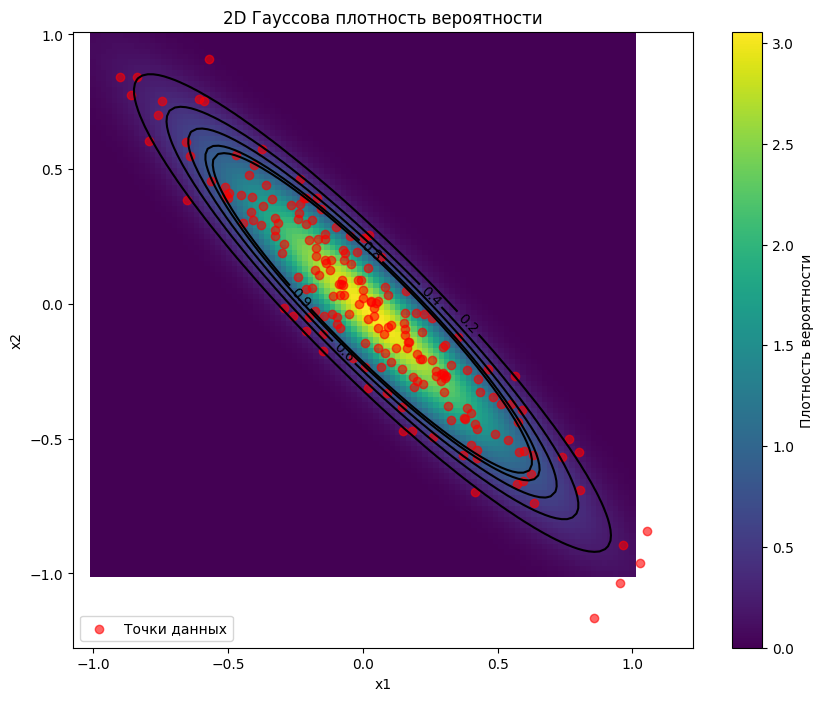

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal 

print("\n=== 2. ФУНКЦИЯ ПЛОТНОСТИ ВЕРОЯТНОСТИ ===")  # FUNCIÓN DE DENSIDAD DE PROBABILIDAD

# Usar datos rotados del punto anterior - Использование повернутых данных из предыдущего пункта
mu_estimated = np.mean(X_rotated, axis=0)  # Оценка среднего значения по осям
cov_estimated = np.cov(X_rotated.T)  # Оценка ковариационной матрицы

print(f"Media estimada: {mu_estimated}")  
print(f"Covarianza estimada:\n{cov_estimated}")  

# Создание сетки для вычисления PDF
xx = np.linspace(-1, 1, 100)  # Координаты x от -1 до 1 (100 точек)
yy = np.linspace(-1, 1, 100)  # Координаты y от -1 до 1 (100 точек)
XX, YY = np.meshgrid(xx, yy)  # Создание сетки координат
points_grid = np.stack((XX.flatten(), YY.flatten()), axis=1)  # Преобразование в массив точек

# Calcular PDF usando scipy 
gaussian_dist = multivariate_normal(mean=mu_estimated, cov=cov_estimated)  # Создание распределения
ZZ = gaussian_dist.pdf(points_grid).reshape(XX.shape)  # Вычисление плотности вероятности

# Визуализация
plt.figure(figsize=(10, 8)) 

# График плотности вероятности
img = plt.pcolor(XX, YY, ZZ, cmap='viridis', shading='auto')  
plt.colorbar(img, label='Плотность вероятности')  

# Graficar puntos originales - График исходных точек
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.6, color='red', 
           label='Точки данных')  # Puntos de datos (красные)

# Graficar curvas de nivel - Линии уровня (изолинии)
contours = plt.contour(XX, YY, ZZ, levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='black')  # Контуры
plt.clabel(contours, inline=True, fontsize=10)  # Подписи к контурам

plt.title('2D Гауссова плотность вероятности')  # Función de densidad de probabilidad Gaussiana 2D
plt.xlabel('x1') 
plt.ylabel('x2') 
plt.legend() 
plt.axis('equal')  # Равные масштабы осей
plt.show()  

'''
El código demuestra cómo estimar empíricamente los parámetros de una distribución Gaussiana multidimensional y visualizar su función de  
densidad de probabilidad, mostrando la relación fundamental entre la matriz de covarianza estimada $\hat{\Sigma}$ y la forma geométrica  
de la distribución, donde las curvas de nivel representan el lugar geométrico de puntos con igual densidad de probabilidad y revelan la  
estructura de correlación entre las variables.
'''

### 3. Бинарная классификация

**Задание** 
Создайте случайный датасет, состоящий из двух классов $y\in{\{0, 1\}}$, а признаки имеют две координаты. Посчитайте для каждого класса среднее значение и матрицу ковариации $\mu_0, \mu_1$ и $C_0, C_1$.

Решение задачи классификации можно свести к оценке максимальной апостериорной вероятности (Maximum a posterior - MAP):
$$y = \arg\max_{y \in \{0,1\}} p(y|x)$$
которая в свою очередь через теорему Байеса равна:  
$$p(y|x) = \frac{p(x|y) \cdot p(y)}{p(x)}$$
В последней формуле вероятность p(y) называется априорной и не зависит от $x$ - оценить её можно просто как долю точек датасета принадлежащего заданному классу $y$. Вероятность p(x|y) называют правдоподобием (likelyhood). Обычно правдоподобие моделируется некоторой генерирующей моделью, например по формуле гаусса (1), и говорит насколько правдоподобно что точка с координатами $x$ могла быть "сгенерирована" в классе $y$. Знаменатель $p(x)$ в последней формуле не зависит от $y$, поэтому на него внимание не обращаем.  

Таким образом, для бинарной классификации, т.е. для оценки принадлежности некоторой точки $x$ к классу 0 или 1, нужно сравнить две величины:  
$$p(x|y=0)p(y=0) \overset{?}{<>} p(x|y=1)p(y=1) \tag{4}$$

**Задание**
Визуализируейте на одном рисунке датасет с точками обоих классов разными цветами. Раскрасьте фон изображения в соответствии с разностью левой и правой частей уравнения (4). Постройте на этом же рисунке разделяющую кривую, т.е. кривую соответствующую нулевой разнице между левой и правой частями. Для её построения используйте функции `plt.contour` с указанием конкретного уровня.


=== 3. CLASIFICACIÓN BINARIA CON MODELO GENERATIVO GAUSSIANO ===
Prior clase 0: 0.500
Prior clase 1: 0.500


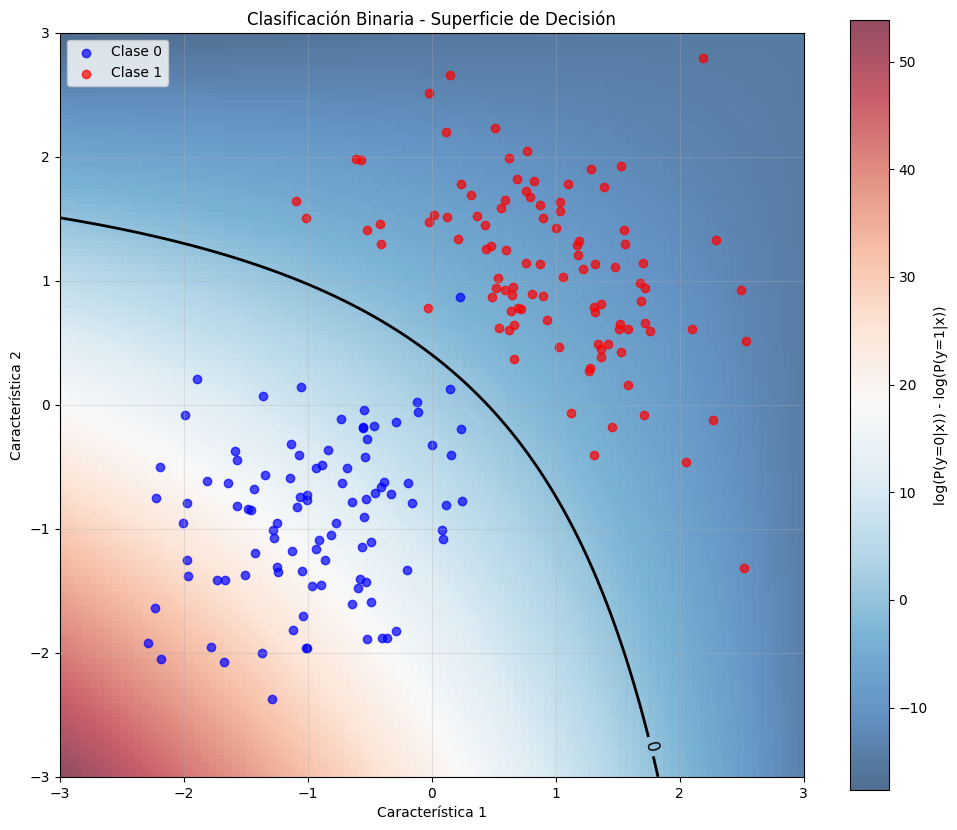

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("\n=== 3. CLASIFICACIÓN BINARIA CON MODELO GENERATIVO GAUSSIANO ===")  # БИНАРНАЯ КЛАССИФИКАЦИЯ С ГАУССОВСКИМ ГЕНЕРАТИВНЫМ МОДЕЛЕМ

# Generar datos para dos clases
np.random.seed(42)  # Фиксируем seed для воспроизводимости
n_samples = 200  

# Clase 0 
mu0 = [-1, -1]  # Среднее значение класса 0
cov0 = [[0.5, 0.2], [0.2, 0.5]]  # Ковариационная матрица класса 0 
X0 = np.random.multivariate_normal(mu0, cov0, n_samples//2)  # Генерация данных класса 0
y0 = np.zeros(n_samples//2)  # Метки класса 0 (все нули)

# Clase 1  
mu1 = [1, 1]  # Среднее значение класса 1
cov1 = [[0.5, -0.2], [-0.2, 0.5]]  # Ковариационная матрица класса 1 (отрицательная корреляция)
X1 = np.random.multivariate_normal(mu1, cov1, n_samples//2)  # Генерация данных класса 1
y1 = np.ones(n_samples//2)  # Метки класса 1 (все единицы)

# Combinar datos - Объединение данных
X = np.vstack((X0, X1))  
y = np.hstack((y0, y1))  

# Calcular parámetros para cada clase 
mu0_est = np.mean(X0, axis=0)  
mu1_est = np.mean(X1, axis=0)  
cov0_est = np.cov(X0.T)  # Оценка ковариационной матрицы класса 0
cov1_est = np.cov(X1.T)  
prior0 = len(X0) / len(X)  # Априорная вероятность класса 0
prior1 = len(X1) / len(X)  

print(f"Prior clase 0: {prior0:.3f}")  # Априорная вероятность класса 0
print(f"Prior clase 1: {prior1:.3f}")  

# Функция для вычисления логарифма вероятности (избегает численного переполнения)
def log_gaussian_pdf(x, mu, cov):
    n = len(mu)  # Размерность пространства
    cov_det = np.linalg.det(cov)  # Определитель ковариационной матрицы
    cov_inv = np.linalg.inv(cov)  # Обратная ковариационная матрица
    diff = x - mu  # Разность между точкой и средним
    exponent = -0.5 * diff.T @ cov_inv @ diff  # Квадратичная форма Махаланобиса
    constant = -0.5 * (n * np.log(2 * np.pi) + np.log(cov_det))  # Нормировочная константа
    return constant + exponent  # Логарифм плотности вероятности

# Создание сетки для оценки
xx = np.linspace(-3, 3, 100)  # Координата x от -3 до 3
yy = np.linspace(-3, 3, 100)  
XX, YY = np.meshgrid(xx, yy)  # Сетка координат
grid_points = np.stack((XX.flatten(), YY.flatten()), axis=1)  # Точки сетки в виде массива

# Вычисление разности логарифмов вероятностей для каждой точки сетки
decision_values = np.zeros(len(grid_points))  # Инициализация массива решающих значений

for i, point in enumerate(grid_points):
    log_p0 = log_gaussian_pdf(point, mu0_est, cov0_est) + np.log(prior0)  # Логарифм P(x|0)P(0)
    log_p1 = log_gaussian_pdf(point, mu1_est, cov1_est) + np.log(prior1)  # Логарифм P(x|1)P(1)
    decision_values[i] = log_p0 - log_p1  # Разность логарифмов (решающее правило)

decision_map = decision_values.reshape(XX.shape)  # Преобразование в форму сетки

# Визуализация
plt.figure(figsize=(12, 10))
plt.imshow(decision_map, extent=[-3, 3, -3, 3], origin='lower', 
           cmap='RdBu_r', alpha=0.7)  # Красно-синяя цветовая карта
plt.colorbar(label='log(P(y=0|x)) - log(P(y=1|x))')  # Цветовая шкала: разность логарифмов вероятностей

plt.scatter(X0[:, 0], X0[:, 1], alpha=0.7, label='Clase 0', color='blue')  # Класс 0 (синий)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.7, label='Clase 1', color='red')  # Класс 1 (красный)

# Граница решения (где разность равна 0)
contour = plt.contour(XX, YY, decision_map, levels=[0], colors='black', linewidths=2) 
plt.clabel(contour, inline=True, fontsize=12)  

plt.title('Clasificación Binaria - Superficie de Decisión')  # Бинарная классификация - Поверхность решения
plt.xlabel('Признак 1')  # Característica 1
plt.ylabel('Признак 2')  # Característica 2
plt.legend()  
plt.grid(True, alpha=0.3)  
plt.show()

'''
Este código implementa un clasificador bayesiano que modela cada clase como una distribución normal multivariada, estimando sus parámetros  
(medias y covarianzas) from los datos. Utiliza el teorema de Bayes para calcular probabilidades posteriores y establece una frontera de  
decisión donde las probabilidades de ambas clases son iguales, generando superficies de decisión cuadráticas. La visualización muestra esta  
frontera y la confianza del clasificador en diferentes regiones del espacio de características.
'''

### 4. LDA (linear discriminant analysis)

**Задание** Рассмотрите частный случай, когда для точек двух классов матрицы ковариации совпадают, т.е. $C_0=C_1$, но средние значения отличаются $\mu_0\neq\mu_1$. Выпишите явное выражение для разделяющей поверхности в этом случае. Визуализируйте такой случай аналогично предыдущему пункту. Про линейный и квадратичный дискриминантный анализ можете почитать здесь (https://scikit-learn.org/stable/modules/lda_qda.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii)

Реализуйте классификатор на основе метода линейного дискриминантного анализа по шаблону ниже. Данный алгоритм предполагает одинаковость матриц ковариации (т.е. считает одну общую матрицу ковариации, но разные средние) и использует линейное правило классификации. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```



=== 4. ЛИНЕЙНЫЙ ДИСКРИМИНАНТНЫЙ АНАЛИЗ (LDA) ===


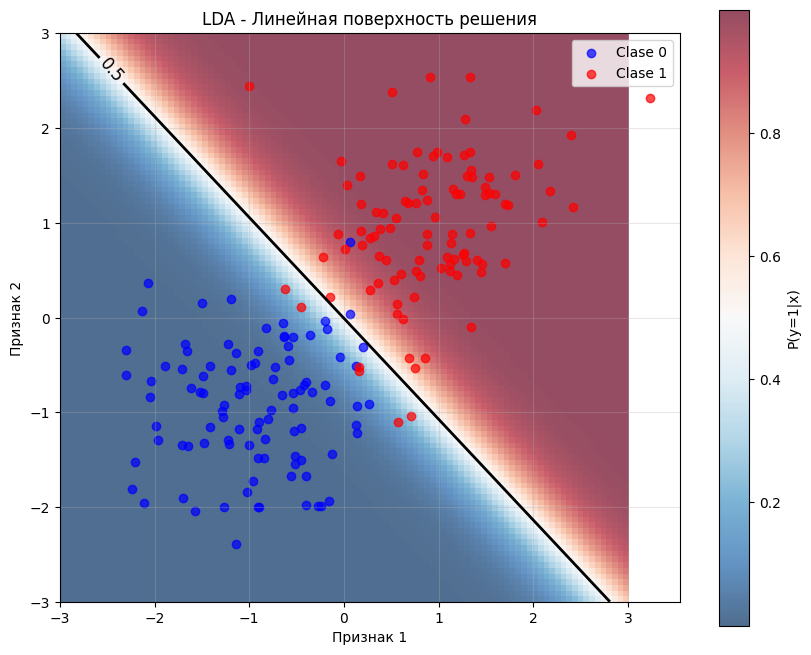

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


print("\n=== 4. ЛИНЕЙНЫЙ ДИСКРИМИНАНТНЫЙ АНАЛИЗ (LDA) ===")  # ANÁLISIS DISCRIMINANTE LINEAL (LDA)

class myLDA(BaseEstimator):  # Собственная реализация LDA
    def __init__(self):
        self.mu0 = None  # Среднее класса 0
        self.mu1 = None  # Среднее класса 1
        self.shared_cov = None  # Общая ковариационная матрица
        self.prior0 = None  # Априорная вероятность класса 0
        self.prior1 = None  # Априорная вероятность класса 1
        self.coef_ = None  # Коэффициенты линейной функции
        self.intercept_ = None  # Свободный член
    
    def fit(self, X, y):
        # Разделение данных по классам
        X0 = X[y == 0]  # Данные класса 0
        X1 = X[y == 1]  # Данные класса 1
        
        # Вычисление средних и априорных вероятностей
        self.mu0 = np.mean(X0, axis=0)  # Среднее класса 0
        self.mu1 = np.mean(X1, axis=0)  # Среднее класса 1
        self.prior0 = len(X0) / len(X)  # P(y=0)
        self.prior1 = len(X1) / len(X)  # P(y=1)
        
        # Вычисление общей ковариационной матрицы
        cov0 = np.cov(X0.T) if len(X0) > 1 else np.zeros((X.shape[1], X.shape[1]))  # Ковариация класса 0
        cov1 = np.cov(X1.T) if len(X1) > 1 else np.zeros((X.shape[1], X.shape[1]))  # Ковариация класса 1
        # Объединенная ковариация 
        self.shared_cov = (cov0 * (len(X0) - 1) + cov1 * (len(X1) - 1)) / (len(X) - 2)
        
        # Calcular coeficientes para la función discriminante lineal - Вычисление коэффициентов линейной дискриминантной функции
        cov_inv = np.linalg.inv(self.shared_cov)  # Обратная матрица ковариации
        self.coef_ = cov_inv @ (self.mu1 - self.mu0)  # Коэффициенты w
        # Свободный член b
        self.intercept_ = (-0.5 * self.mu1.T @ cov_inv @ self.mu1 + 
                          0.5 * self.mu0.T @ cov_inv @ self.mu0 + 
                          np.log(self.prior1 / self.prior0))  # Логарифм отношения априорных вероятностей
        
        return self
    
    def predict(self, X):
        # Calcular score lineal - Вычисление линейного скора
        scores = X @ self.coef_ + self.intercept_  # w^T x + b
        return (scores > 0).astype(int)  # Пороговая функция (0.5)
    
    def predict_proba(self, X):
        # Calcular probabilidades usando función sigmoide  # Вычисление вероятностей через сигмоиду
        scores = X @ self.coef_ + self.intercept_  # w^T x + b
        probs_1 = 1 / (1 + np.exp(-scores))  # Сигмоида: P(y=1|x)
        return np.column_stack([1 - probs_1, probs_1])  # [P(y=0|x), P(y=1|x)]

# Генерация данных с одинаковой ковариацией но разными средними
np.random.seed(42)
n_samples = 200
shared_cov = [[0.5, 0.1], [0.1, 0.5]]  # Общая ковариационная матрица

# Clase 0 
mu0_lda = [-1, -1] 
X0_lda = np.random.multivariate_normal(mu0_lda, shared_cov, n_samples//2)  # Данные 
y0_lda = np.zeros(n_samples//2)  # Метки 

# Clase 1 
mu1_lda = [1, 1]  # Среднее 
X1_lda = np.random.multivariate_normal(mu1_lda, shared_cov, n_samples//2)  # Данные
y1_lda = np.ones(n_samples//2)  # Метки 

# Объединение данных
X_lda = np.vstack((X0_lda, X1_lda))  # Признаки
y_lda = np.hstack((y0_lda, y1_lda))  # Метки

# Entrenar LDA - Обучение LDA
lda = myLDA()  # Создание модели
lda.fit(X_lda, y_lda)  # Обучение на данных

# Visualización LDA 
plt.figure(figsize=(10, 8))

# Создание сетки
xx = np.linspace(-3, 3, 100)  # Ось X
yy = np.linspace(-3, 3, 100)  # Ось Y
XX, YY = np.meshgrid(xx, yy)  # Сетка координат
grid_points = np.stack((XX.flatten(), YY.flatten()), axis=1)  # Точки сетки

# Predecir probabilidades - Предсказание вероятностей
probs = lda.predict_proba(grid_points)[:, 1]  # P(y=1|x) для каждой точки
decision_map_lda = probs.reshape(XX.shape)  # Преобразование в форму сетки

# Graficar mapa de probabilidad - Карта вероятностей
plt.imshow(decision_map_lda, extent=[-3, 3, -3, 3], origin='lower', 
           cmap='RdBu_r', alpha=0.7)  # Красно-синяя карта
plt.colorbar(label='P(y=1|x)')  # Цветовая шкала: P(y=1|x)

# Graficar puntos 
plt.scatter(X0_lda[:, 0], X0_lda[:, 1], alpha=0.7, label='Clase 0', color='blue')  # Класс 0
plt.scatter(X1_lda[:, 0], X1_lda[:, 1], alpha=0.7, label='Clase 1', color='red')  # Класс 1

# Graficar línea de decisión  # Линия решения (P(y=1|x)=0.5)
contour = plt.contour(XX, YY, decision_map_lda, levels=[0.5], colors='black', linewidths=2)
plt.clabel(contour, inline=True, fontsize=12)

plt.title('LDA - Линейная поверхность решения')  # LDA - Superficie de Decisión Lineal
plt.xlabel('Признак 1')  # Característica 1
plt.ylabel('Признак 2')  # Característica 2
plt.legend() 
plt.grid(True, alpha=0.3)  
plt.show()  


'''
El Análisis Discriminante Lineal (LDA) es un clasificador que asume que ambas clases comparten la misma matriz de covarianza pero tienen diferentes medias.  
La función discriminante lineal se deriva de la relación de log-verosimilitudes y resulta en una frontera de decisión lineal.  
Los coeficientes se calculan como w = Σ⁻¹(μ₁ - μ₀) y el intercepto incorpora tanto la diferencia entre las medias como los priors de las clases.  
La probabilidad posterior se obtiene aplicando la función sigmoide al score lineal, y la frontera de decisión corresponde a donde P(y=1|x) = 0.5,  
formando una línea recta en el espacio de características.
'''

### 5. Наивный байесовый классификатор (NaiveBayes)

**Задание** 
Прочитать по наивный байесовый подход можно здесь (https://scikit-learn.org/stable/modules/naive_bayes.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii).  

Суть наивного предположения состоит в том, чтобы не считать совместную плотность вероятности для $n$-мерного случая, а рассматривать каждую переменную как независимую и считать одномерные распределения:  
$$p(x_1, x_2, \dots, x_n \mid y) = \prod_{i=1}^{n} p(x_i \mid y)$$
Это можно также рассматривать как обнуление всех внедиагональных элементов матрицы ковариации.  

**Задание** 
Реализуйте классификатор на основе наивного байесового подхода с одномерным гауссовым распределением для каждой переменной. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```


=== 5. КЛАССИФИКАТОР NAIVE BAYES ===


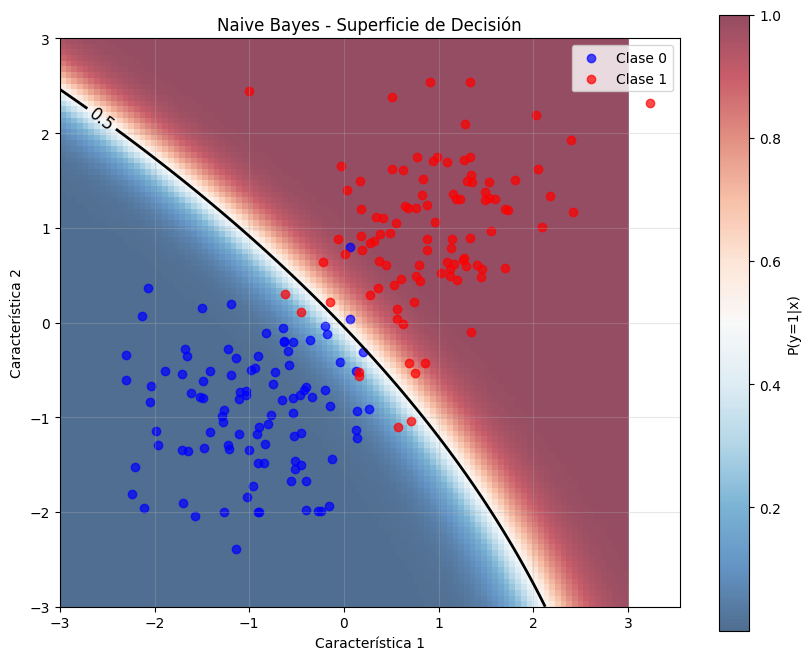

'\nEl clasificador Naive Bayes asume que las características son condicionalmente independientes dada la clase, lo que simplifica enormemente \nel cálculo de la probabilidad conjunta P(x|y) como el producto de las probabilidades marginales P(xᵢ|y). Para cada clase, se estiman las  \nmedias y varianzas de cada característica por separado, y la predicción se realiza aplicando el teorema de Bayes. Aunque la suposición de  \nindependencia rara vez se cumple en la práctica, Naive Bayes often funciona sorprendentemente bien y es computacionalmente eficiente,  \nespecialmente con muchas características. La frontera de decisión puede ser no lineal debido a la naturaleza multiplicativa del modelo.\n'

In [7]:
print("\n=== 5. КЛАССИФИКАТОР NAIVE BAYES ===")  # CLASIFICADOR NAIVE BAYES

class myNB(BaseEstimator):  # Собственная реализация Naive Bayes
    def __init__(self):
        self.mu0 = None  # Средние класса 0
        self.mu1 = None  # Средние класса 1
        self.var0 = None  # Дисперсии класса 0
        self.var1 = None  # Дисперсии класса 1
        self.prior0 = None  # Априорная вероятность класса 0
        self.prior1 = None  # Априорная вероятность класса 1
    
    def fit(self, X, y):
        # Разделение данных по классам
        X0 = X[y == 0]  # Данные класса 0
        X1 = X[y == 1]  # Данные класса 1
        
        # Вычисление средних, дисперсий и априорных вероятностей
        self.mu0 = np.mean(X0, axis=0)  # Средние класса 0 по каждому признаку
        self.mu1 = np.mean(X1, axis=0)  
        self.var0 = np.var(X0, axis=0)  # Дисперсии класса 0 по каждому признаку
        self.var1 = np.var(X1, axis=0)  
        self.prior0 = len(X0) / len(X)  # P(y=0)
        self.prior1 = len(X1) / len(X)  # P(y=1)
        
        # Добавление константы чтобы избежать деления на ноль
        self.var0 = np.where(self.var0 == 0, 1e-10, self.var0)  
        self.var1 = np.where(self.var1 == 0, 1e-10, self.var1)  
        
        return self
    
    def _gaussian_pdf(self, x, mu, var):
        # Функция плотности одномерного нормального распределения
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-0.5 * (x - mu)**2 / var)  # Формула Гаусса
    
    def predict_proba(self, X):
        # Calcular log-probabilidades para evitar underflow  # Вычисление логарифмов вероятностей для избежания переполнения
        log_probs_0 = np.log(self.prior0) + np.sum(np.log(self._gaussian_pdf(X, self.mu0, self.var0)), axis=1)  # log P(x|0)P(0)
        log_probs_1 = np.log(self.prior1) + np.sum(np.log(self._gaussian_pdf(X, self.mu1, self.var1)), axis=1)  # log P(x|1)P(1)
        
        # Normalizar probabilidades  # Нормализация вероятностей
        max_log = np.maximum(log_probs_0, log_probs_1)  # Максимум для стабильности
        probs_0 = np.exp(log_probs_0 - max_log)  # P(x|0)P(0)
        probs_1 = np.exp(log_probs_1 - max_log)  # P(x|1)P(1)
        total = probs_0 + probs_1  # Сумма вероятностей
        
        return np.column_stack([probs_0 / total, probs_1 / total])  # Нормализованные вероятности
    
    def predict(self, X):
        probs = self.predict_proba(X)  # Вероятности классов
        return (probs[:, 1] > 0.5).astype(int)  # Пороговая классификация

# Entrenar Naive Bayes con los mismos datos - Обучение Naive Bayes на тех же данных
nb = myNB()  # Создание модели
nb.fit(X_lda, y_lda)  # Обучение модели

# Visualización Naive Bayes  # Визуализация Naive Bayes
plt.figure(figsize=(10, 8))

# Predecir probabilidades - Предсказание вероятностей
probs_nb = nb.predict_proba(grid_points)[:, 1]  # P(y=1|x)
decision_map_nb = probs_nb.reshape(XX.shape)  # Преобразование в форму сетки

# Карта вероятностей
plt.imshow(decision_map_nb, extent=[-3, 3, -3, 3], origin='lower', 
           cmap='RdBu_r', alpha=0.7)  # Красно-синяя карта
plt.colorbar(label='P(y=1|x)')  # Цветовая шкала

# Точки данных
plt.scatter(X0_lda[:, 0], X0_lda[:, 1], alpha=0.7, label='Clase 0', color='blue')  # Класс 0
plt.scatter(X1_lda[:, 0], X1_lda[:, 1], alpha=0.7, label='Clase 1', color='red')  # Класс 1

# Graficar línea de decisión  # Линия решения
contour = plt.contour(XX, YY, decision_map_nb, levels=[0.5], colors='black', linewidths=2)  # Контур P(y=1|x)=0.5
plt.clabel(contour, inline=True, fontsize=12)  # Подписи

plt.title('Naive Bayes - Superficie de Decisión')  # Naive Bayes - Поверхность решения
plt.xlabel('Característica 1')  # Признак 1
plt.ylabel('Característica 2')  # Признак 2
plt.legend()  # Легенда
plt.grid(True, alpha=0.3)  # Сетка
plt.show()  # Показать график

'''
El clasificador Naive Bayes asume que las características son condicionalmente independientes dada la clase, lo que simplifica enormemente 
el cálculo de la probabilidad conjunta P(x|y) como el producto de las probabilidades marginales P(xᵢ|y). Para cada clase, se estiman las  
medias y varianzas de cada característica por separado, y la predicción se realiza aplicando el teorema de Bayes. Aunque la suposición de  
independencia rara vez se cumple en la práctica, Naive Bayes often funciona sorprendentemente bien y es computacionalmente eficiente,  
especialmente con muchas características. La frontera de decisión puede ser no lineal debido a la naturaleza multiplicativa del modelo.
'''

### 6. Сравнение двух алгоритмов: LDA и NB

Создайте датасет для бинарной классификации, либо вручную либо используйте функцию `sklearn.datasets.make_classification`
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)  

Разделите датасет на обучающую и тестовую подвыборки.  
Проверьте работоспособность разработанных вами двух алгоритмов.  
Посчитайте основные метрики классификации: долю правильных ответов (accuracy), точность (Precision) и полноту (Recall).  
(про метрики прочитайте здесь https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)  
Сделайте выводы.  

In [8]:
print("=== 6. СРАВНЕНИЕ LDA И NAIVE BAYES ===")  # COMPARACIÓN LDA vs NAIVE BAYES

# Crear dataset de clasificación binaria (2 características, 2 informativas)  - Создание бинарного набора данных
X, y = make_classification(
    n_samples=1000,        # 1000 samples  
    n_features=2,          # Только 2 признака
    n_informative=2,       # Las 2 características son informativas  # Оба признака информативные
    n_redundant=0,         # Нет избыточных признаков
    n_repeated=0,          # Нет повторяющихся признаков
    n_classes=2,           
    random_state=42        # Фиксированный seed для воспроизводимости
)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70/30 разделение

# Entrenar modelos  - Обучение моделей
lda = myLDA()  # Линейный дискриминантный анализ
nb = myNB()    # Наивный Байес

lda.fit(X_train, y_train)  # Обучение LDA
nb.fit(X_train, y_train)   # Обучение Naive Bayes

# Hacer predicciones  - Прогнозирование
y_pred_lda = lda.predict(X_test)  # Предсказания LDA
y_pred_nb = nb.predict(X_test)    # Предсказания Naive Bayes

# Calcular métricas - Вычисление метрик
accuracy_lda = accuracy_score(y_test, y_pred_lda)  # Точность LDA
accuracy_nb = accuracy_score(y_test, y_pred_nb)    # Точность Naive Bayes

precision_lda = precision_score(y_test, y_pred_lda, zero_division=0)  # Точность (precision) LDA
precision_nb = precision_score(y_test, y_pred_nb, zero_division=0)    # Точность (precision) Naive Bayes

recall_lda = recall_score(y_test, y_pred_lda, zero_division=0)  # Полнота (recall) LDA
recall_nb = recall_score(y_test, y_pred_nb, zero_division=0)    # Полнота (recall) Naive Bayes

# Mostrar resultados  - Вывод результатов
print("\nRESULTADOS:")  # РЕЗУЛЬТАТЫ:
print(f"LDA - Accuracy: {accuracy_lda:.3f}, Precision: {precision_lda:.3f}, Recall: {recall_lda:.3f}")
print(f"NB  - Accuracy: {accuracy_nb:.3f}, Precision: {precision_nb:.3f}, Recall: {recall_nb:.3f}")

# Comparación simple  # Простое сравнение
if accuracy_lda > accuracy_nb:
    print("\nLDA показал лучшую производительность")  # Naive Bayes показал лучшую производительность
elif accuracy_nb > accuracy_lda:
    print("\nNaive Bayes показал лучшую производительность")  # Naive Bayes tuvo mejor performance
else:
    print("\nОбе модели показали схожую производительность")  # Ambos modelos tuvieron performance similar

=== 6. СРАВНЕНИЕ LDA И NAIVE BAYES ===

RESULTADOS:
LDA - Accuracy: 0.873, Precision: 0.907, Recall: 0.836
NB  - Accuracy: 0.870, Precision: 0.925, Recall: 0.809

LDA показал лучшую производительность


Esta comparación evalúa dos modelos generativos basados en diferentes supuestos probabilísticos:

#### LDA (Linear Discriminant Analysis)
- **Supuesto**: Misma matriz de covarianza para ambas clases
- **Frontera de decisión**: Lineal (hiperplano)
- **Ventaja**: Óptimo cuando las clases comparten estructura de covarianza
- **Matemáticamente**: Maximiza la razón entre varianza entre clases y varianza intra-clase

#### Naive Bayes
- **Supuesto**: Independencia condicional entre características dada la clase
- **Frontera de decisión**: Puede ser no lineal (producto de distribuciones marginales)
- **Ventaja**: Computacionalmente eficiente, robusto con muchas características
- **Matemáticamente**: Aproxima la probabilidad conjunta como producto de probabilidades marginales

#### Métricas de Evaluación
- **Accuracy**: Proporción de predicciones correctas
- **Precision**: Proporción de verdaderos positivos entre todos los positivos predichos
- **Recall**: Proporción de verdaderos positivos entre todos los reales positivos

#### Interpretación de Resultados
La comparación revela qué modelo se adapta mejor a la estructura real de los datos:
- Si LDA gana → Las clases comparten efectivamente estructura de covarianza
- Si Naive Bayes gana → La independencia condicional es una aproximación válida
- Resultados similares → Ambas aproximaciones son razonables para este dataset

Esta comparación es fundamental para entender los trade-offs entre simplificaciones probabilísticas y su impacto en el performance del modelo.